In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

In [2]:
# transformed features and new features
network_3 = pd.read_csv('../data/with_indicators_training.csv')

# split the data into training and validation
X_train, X_val, y_train, y_val = train_test_split(network_3.drop('class', axis=1), network_3['class'], test_size=0.2, random_state=42)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [4]:
# 1 - 30
knn_param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)

print(f"Best hyperparameters: {knn_grid_search.best_params_}")
print(f"Best estimator: {knn_grid_search.best_estimator_}")

knn_grid_predictions = knn_grid_search.predict(X_val_scaled)
print(classification_report(y_val, knn_grid_predictions))

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       459
           1       0.99      0.99      0.99       396

    accuracy                           0.99       855
   macro avg       0.99      0.99      0.99       855
weighted avg       0.99      0.99      0.99       855



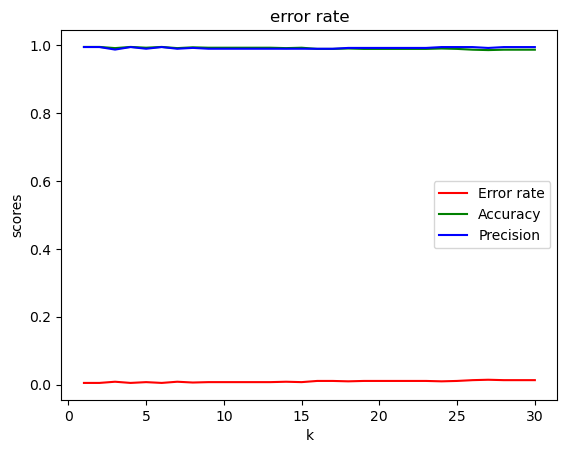

In [5]:
# graph the numbers || not great visual,numbers too far apart
error_scores = []
accuracy_scores = []
precision_scores = []

#1 - 30
for k in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=k, weights=knn_grid_search.best_params_['weights'])
    knn_model.fit(X_train_scaled, y_train)
    knn_predicted_labels = knn_model.predict(X_val_scaled)
    
    error = 1 - accuracy_score(y_val, knn_predicted_labels)
    error_scores.append(error)
    
    accuracy = accuracy_score(y_val, knn_predicted_labels)
    accuracy_scores.append(accuracy)
    
    precision = precision_score(y_val, knn_predicted_labels)
    precision_scores.append(precision)

plt.plot(range(1, 31), error_scores, color='red', label='Error rate')
plt.plot(range(1, 31), accuracy_scores, color='green', label='Accuracy')
plt.plot(range(1, 31), precision_scores, color='blue', label='Precision')

plt.xlabel('k')
plt.ylabel('scores')
plt.title('error rate')
plt.legend()
plt.show()

In [7]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10, 100]
}

svm = SVC()

svm_grid_search = GridSearchCV(svm, param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best estimator: {svm_grid_search.best_estimator_}")

svm_grid_predictions = svm_grid_search.predict(X_val_scaled)

print(classification_report(y_val, svm_grid_predictions))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator: SVC(C=10, gamma=0.1)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       459
           1       0.98      0.99      0.99       396

    accuracy                           0.99       855
   macro avg       0.99      0.99      0.99       855
weighted avg       0.99      0.99      0.99       855



In [8]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

dt_grid_search = GridSearchCV(dt, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {dt_grid_search.best_params_}")
print(f"Best estimator: {dt_grid_search.best_estimator_}")

dt_grid_predictions = dt_grid_search.predict(X_val_scaled)

print(classification_report(y_val, dt_grid_predictions))

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best estimator: DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=42)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       459
           1       0.99      0.99      0.99       396

    accuracy                           0.99       855
   macro avg       0.99      0.99      0.99       855
weighted avg       0.99      0.99      0.99       855



In [9]:
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(rf, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best estimator: {rf_grid_search.best_estimator_}")

rf_grid_predictions = rf_grid_search.predict(X_val_scaled)

print(classification_report(y_val, rf_grid_predictions))

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best estimator: RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       459
           1       0.99      0.99      0.99       396

    accuracy                           0.99       855
   macro avg       0.99      0.99      0.99       855
weighted avg       0.99      0.99      0.99       855

